In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline
import scipy as sp
from scipy.integrate import odeint
from scipy.misc import derivative
from math import pi

In [3]:
numerodepontos = 100
Hm = np.array([-51000, -50000, -49500, -49000, -48000, -47500, -47000, -46500, -45500, -43000, -37000, -31000, -26000, 0])

Bm = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.05, 1.1, 1.2])

Hm_linear = np.array([-51000 , 0]) # A/m
Bm_linear = np.array ([0 , 1.2]) # T
f = CubicSpline(Bm , Hm , bc_type = 'natural') #função interpoladora real
f_linear = CubicSpline(Bm_linear, Hm_linear, bc_type = 'natural') # função interpoladora linear
Bm_ = np.linspace(0 , 1.2 , numerodepontos) # varia ção do fluxo do imã de 0 a 1.2 T
Hm_real = f(Bm_)
Hm_linear = f_linear (Bm_)


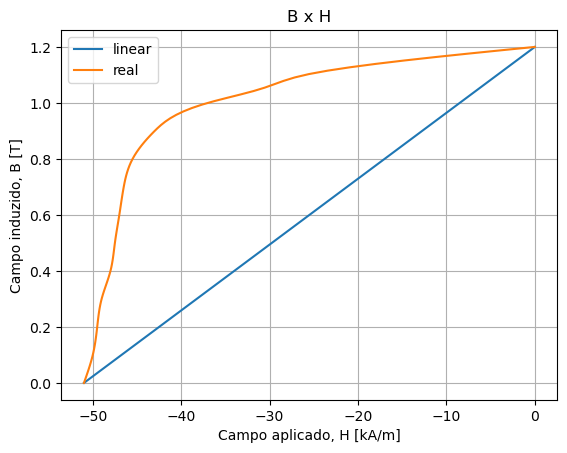

In [4]:
plt.xlabel('Campo aplicado, H [kA/m]')
plt.ylabel('Campo induzido, B [T]')
plt.title('B x H')

plt.plot(Hm_linear/1000, Bm_ , label='linear')
plt.plot(Hm_real/1000, Bm_ , label='real')
plt.grid()
plt.legend()
plt.show()

Obtenção da função de lambda e integração da corrente na bobina imaginária

In [5]:
D = 0.035
W = 0.04
g0 = 0.001
d = 0.008
u0 = 4*pi*(10**-7)
Nf = 1
If = -(51000*d)

Aar = D*W
Am = Aar

wc_real = np.zeros([numerodepontos]) # co-energia real
wc_linear = np.zeros([numerodepontos]) # co-energia linear
lambdaR = np.zeros([numerodepontos]) # fluxo concatenado
i_real = np.zeros([numerodepontos]) # corrente calculada real
i_linear = np.zeros([numerodepontos]) # corrente calculada linear
bm = np.linspace(0, 1.2, numerodepontos ) # varia ção do fluxo do imã de 0 a 1.2 T
x_valores = np.linspace(0, 1.5*10**-2, numerodepontos) # varia ção de x de 0 a 1.5 cm
I_int = np.linspace(If , 0, numerodepontos ) # integrar de IF até 0

for p in range (0, numerodepontos, 1):
  x = x_valores[p]
  for b in range (0, numerodepontos, 1):
    lambdaR[b] = bm[b]*Am*Nf
    i_real[b] = (f(bm[b])*d + (bm[b]*(g0 + x))/u0)/Nf
    i_linear[b] = (f_linear(bm[b])*d + (bm[b]*(g0 + x))/u0)/Nf

  F_fi_real = CubicSpline(i_real, lambdaR, bc_type = 'natural') # interpolação para a curva I x lambda do imã real

  F_fi_linear = CubicSpline(i_linear, lambdaR, bc_type = 'natural') # interpolação para a curva I x lambda do imã linear

  lambda_real = F_fi_real(I_int)
  lambda_linear = F_fi_linear(I_int)

  wc_real[p] = sp.integrate.trapezoid(lambda_real, I_int)
  wc_linear[p] = sp.integrate.trapezoid(lambda_linear, I_int)

WC_real = CubicSpline(x_valores, wc_real, bc_type = 'natural') # interpolação para a curva X x w’ do imã real
WC_linear = CubicSpline(x_valores, wc_linear, bc_type = 'natural') # interpolação para a curva X x w’ do imã linear

derivada_WC_real = WC_real.derivative()
derivada_WC_linear = WC_linear.derivative()

Forca_real = derivada_WC_real(x_valores)
Forca_linear = derivada_WC_linear(x_valores)


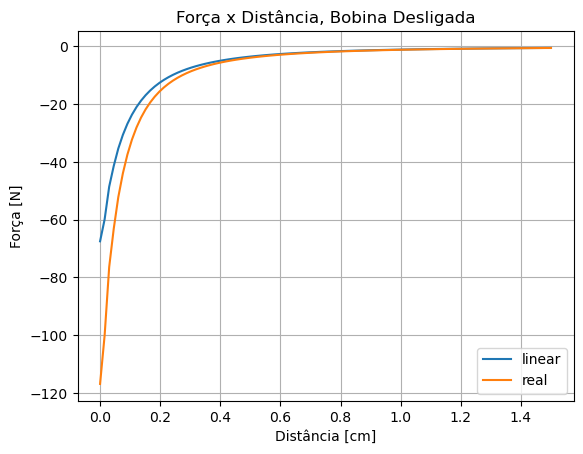

In [6]:
plt.xlabel('Distância [cm]')
plt.ylabel('Força [N]')
plt.title('Força x Distância, Bobina Desligada')

plt.plot(x_valores*100, Forca_linear , label='linear')
plt.plot((x_valores)*100, Forca_real, label='real')
plt.grid()
plt.legend()
plt.show()

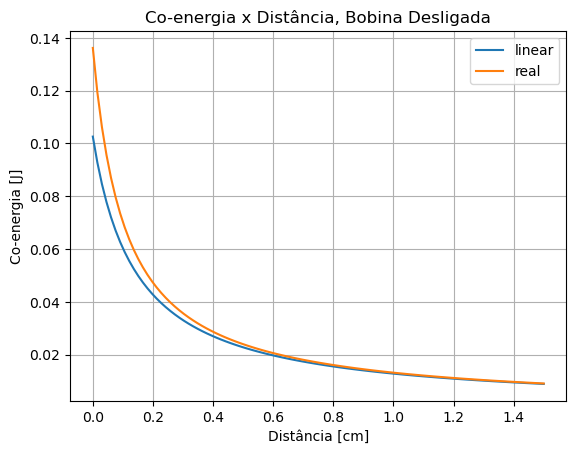

In [7]:
plt.xlabel('Distância [cm]')
plt.ylabel('Co-energia [J]')
plt.title('Co-energia x Distância, Bobina Desligada')

plt.plot(x_valores*100, wc_linear , label='linear')
plt.plot((x_valores)*100, wc_real, label='real')
plt.grid()
plt.legend()
plt.show()

esse aqui usa codigo parecido com o de cima mas é menos coisa:

NI = Hm x d + Har x (g0 + x)

a corrente vai ta gerando um fluxo negativo entao o valor do fluxo fica o complemento do imã pra 1.2T

In [8]:
N1 = 1000
B_pontoreal = np.zeros([numerodepontos]) # B real do entreferro
B_pontolinear = np.zeros([numerodepontos]) # B real do entreferro
ib_real = np.zeros([numerodepontos]) # corrente calculada real
ib_linear = np.zeros([numerodepontos]) # corrente calculada linear
ib_realap = np.zeros([numerodepontos]) # corrente calculada real aplicada
ib_linearap  = np.zeros([numerodepontos]) # corrente calculada linear aplicada
for c in range (0, numerodepontos, 1):
    B_pontoreal[c] = bm[numerodepontos - 1 - c]
    B_pontolinear[c] = bm[numerodepontos - 1 - c]
    ib_real[c] = ((f(bm[c])*d + (bm[c]*(g0 + 0.005))/u0))/N1
    ib_linear[c] = ((f_linear(bm[c])*d + (bm[c]*(g0 + 0.005))/u0))/N1
    ib_realap[c] = ib_real[c] - ib_real[0]
    ib_linearap[c] = ib_linear[c] - ib_linear[0]



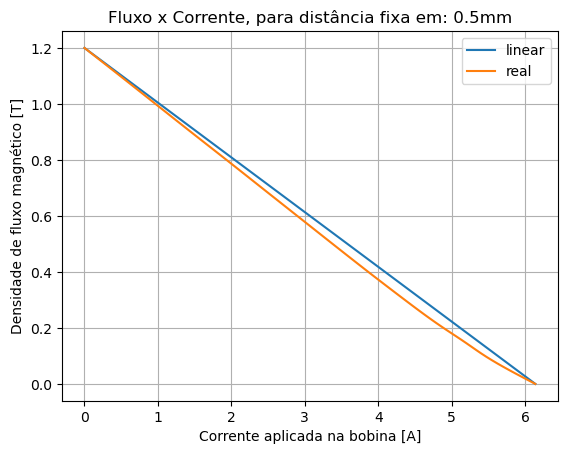

In [9]:
plt.xlabel('Corrente aplicada na bobina [A]')
plt.ylabel('Densidade de fluxo magnético [T]')
plt.title('Fluxo x Corrente, para distância fixa em: 0.5mm')

plt.plot(ib_linearap, B_pontolinear, label='linear')
plt.plot(ib_realap, B_pontoreal, label='real')
plt.grid()
plt.legend()
plt.show()

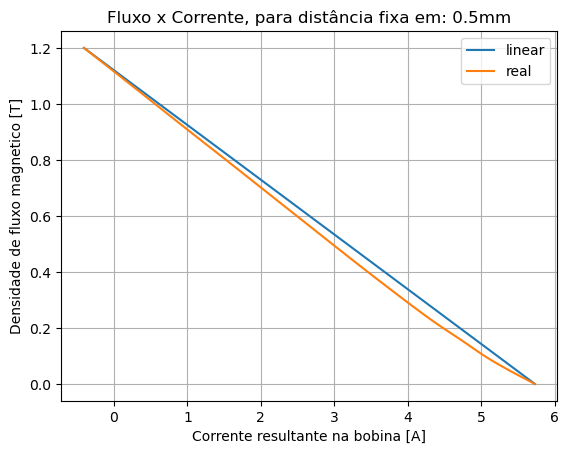

In [10]:
plt.xlabel('Corrente resultante na bobina [A]')
plt.ylabel('Densidade de fluxo magnetico [T]')
plt.title('Fluxo x Corrente, para distância fixa em: 0.5mm')

plt.plot(ib_linear, B_pontolinear, label='linear')
plt.plot(ib_real, B_pontoreal, label='real')
plt.grid()
plt.legend()
plt.show()

para 1.05T, H = -31000

Vai ter que usar a força eletromotriz total entao aqui subtrai a força eletromotriz do imã que passa pro outro lado somando


In [11]:
correntenominal_real = ((f(0.15)*d + (0.15*(g0 + 0.005))/u0)+Nf*If)/N1
correntenominal_linear = ((f_linear(0.15)*d + (0.15*(g0 + 0.005))/u0)+Nf*If)/N1
correntenominal_realap = ((f(0.15)*d + (0.15*(g0 + 0.005))/u0)+Nf*If)/N1 - ib_real[0]
correntenominal_linearap = ((f_linear(0.15)*d + (0.15*(g0 + 0.005))/u0)+Nf*If)/N1 - ib_linear[0]

O máximo é 1.05T
mesmo raciocinio da outra conta de força, mas aqui vai em relação a bobina e vai do I0 ate a corrente nominal calculada na celular anterior, que vai dar em modulo a força da bobina menos a força do imã

In [12]:
I0_linear = ib_linear[0]
I0_real = ib_real[0]

Ben_cc = np.linspace(0, 1.05, numerodepontos) # B real do entreferro
wc_real_cc = np.zeros([numerodepontos]) # co- energia
wc_linear_cc = np.zeros([numerodepontos]) # co- energia
lambdaR_cc = np.zeros([numerodepontos]) # fluxo concatenado
i_real_cc = np.zeros([numerodepontos]) # corrente calculada real
i_linear_cc = np.zeros([numerodepontos]) # corrente calculada linear
x_valores_cc = np.linspace(0, 1.5*10**-2, numerodepontos) # varia ção de x de 0 a 1.5 cm
I_intreal = np.linspace(I0_real, correntenominal_real, numerodepontos ) # integrar de I0 até a corrente nominal
I_intlinear = np.linspace(I0_linear, correntenominal_linear, numerodepontos ) # integrar de I0 até a corrente nominal

for p in range (0, numerodepontos, 1):
  x = x_valores_cc[p]
  for b in range (0, numerodepontos, 1):
    lambdaR_cc[b] = Ben_cc[b]*Am*N1
    i_real_cc[b] = (f(Ben_cc[b])*d + (Ben_cc[b]*(g0 + x))/u0)/N1
    i_linear_cc[b] = (f_linear(Ben_cc[b])*d + (Ben_cc[b]*(g0 + x))/u0)/N1

  F_fi_real_cc = CubicSpline(i_real_cc, lambdaR_cc, bc_type = 'natural') # interpolação para a curva I x lambda do imã real

  F_fi_linear_cc = CubicSpline(i_linear_cc, lambdaR_cc, bc_type = 'natural') # interpola ção para a curva I x lambda do imã linear

  lambda_real_cc = F_fi_real_cc(I_intreal)
  lambda_linear_cc = F_fi_linear_cc(I_intlinear)

  wc_real_cc[p] = sp.integrate.trapezoid(lambda_real_cc, I_intreal)
  wc_linear_cc[p] = sp.integrate.trapezoid(lambda_linear_cc, I_intlinear)

WC_real_cc = CubicSpline(x_valores_cc, wc_real_cc, bc_type = 'natural') # interpola ção para a curva X x w’ do imã real
WC_linear_cc = CubicSpline(x_valores_cc, wc_linear_cc, bc_type = 'natural') # interpola ção para a curva X x w’ do imã linear

derivada_WC_real_cc = WC_real_cc.derivative()
derivada_WC_linear_cc = WC_linear_cc.derivative()

Forca_real_cc = derivada_WC_real_cc(x_valores_cc)
Forca_linear_cc = derivada_WC_linear_cc(x_valores_cc)

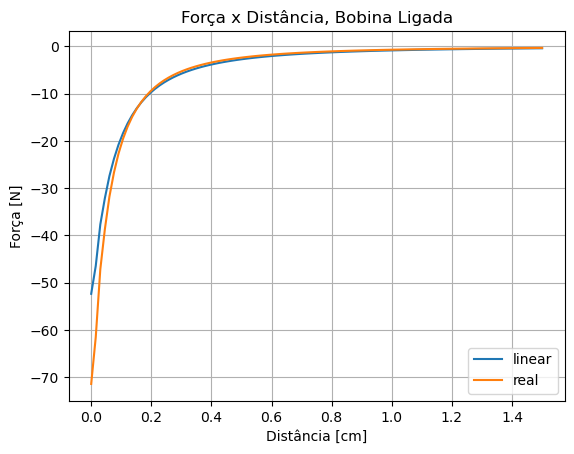

In [13]:
plt.xlabel('Distância [cm]')
plt.ylabel('Força [N]')
plt.title('Força x Distância, Bobina Ligada')

plt.plot(x_valores_cc*100, Forca_linear_cc, label='linear')
plt.plot((x_valores_cc)*100, Forca_real_cc, label='real')
plt.grid()
plt.legend()
plt.show()

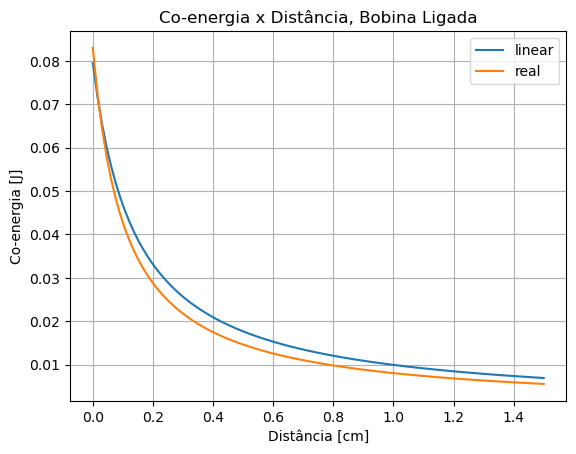

In [14]:
plt.xlabel('Distância [cm]')
plt.ylabel('Co-energia [J]')
plt.title('Co-energia x Distância, Bobina Ligada')

plt.plot(x_valores_cc*100, wc_linear_cc, label='linear')
plt.plot((x_valores_cc)*100, wc_real_cc, label='real')
plt.grid()
plt.legend()
plt.show()

Massas calculadas tem valores diferente pois são de curvas de força distintas

In [19]:
massa_real = -(derivada_WC_real_cc(0.0005)*1.1/9.81)
massa_linear = -(derivada_WC_linear_cc(0.0005)*1.1/9.81)

print('massa real:', massa_real, 'massa da aproximação linear:', massa_linear)

massa real: 4.0774320822941865 massa da aproximação linear: 3.4276711807075086


In [16]:
posicao_inicial, posicao_final = 0.0005, 0.1
NUMERO_DE_PONTOS = 100

In [17]:
#força resultante no êmbulo
forca_resultante_real = massa_real*9.81 + Forca_real_cc
forca_resultante_linear = massa_linear*9.81 + Forca_linear_cc

#intervalo de posições
intervalo_posicao = np.arange(posicao_inicial, posicao_final, (posicao_final-posicao_inicial)/NUMERO_DE_PONTOS)
v_func = np.zeros(shape=(2, intervalo_posicao.shape[0]))
vetor_tempos = np.zeros(shape=(2, intervalo_posicao.shape[0]))
posicoes_tempo = np.zeros(shape=(2, intervalo_posicao.shape[0]))

vetor_aceleracoes = np.zeros(shape=(2, intervalo_posicao.shape[0]))

vetor_aceleracoes[0] = forca_resultante_real/massa_real
vetor_aceleracoes[1] = forca_resultante_linear/massa_linear

#obtenção de função velocidade na posição
for j in range(len(intervalo_posicao)):
  v_func[0][j] = np.sqrt(2*sp.integrate.trapezoid(abs(vetor_aceleracoes[0][:j]), intervalo_posicao[:j]))
  v_func[1][j] = np.sqrt(2*sp.integrate.trapezoid(abs(vetor_aceleracoes[1][:j]), intervalo_posicao[:j]))

#obtenção de função tempo na velocidade
for j in range(len(intervalo_posicao)):
  vetor_tempos[0][j] = sp.integrate.trapezoid(1/v_func[0][2:j], intervalo_posicao[2:j])
  vetor_tempos[1][j] = sp.integrate.trapezoid(1/v_func[1][2:j], intervalo_posicao[2:j])

#obtenção de função posição no tempo
for j in range(len(intervalo_posicao)):
  posicoes_tempo[0][j] = sp.integrate.trapezoid(v_func[0][:j], vetor_tempos[0][:j])
  posicoes_tempo[1][j] = sp.integrate.trapezoid(v_func[1][:j], vetor_tempos[1][:j])


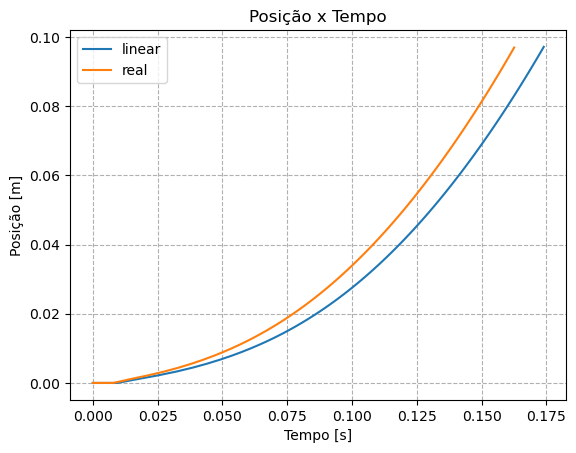

In [18]:
plt.ylabel('Posição [m]')
plt.xlabel('Tempo [s]')
plt.title('Posição x Tempo')
plt.grid(True, linestyle='--')
plt.plot(vetor_tempos[1], posicoes_tempo[1], label='linear')
plt.plot(vetor_tempos[0], posicoes_tempo[0], label='real')
plt.legend()
plt.show()
